In [1]:
# instalar as dependências
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!rm spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark
#!pip install pyspark

In [2]:
# configurar as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

# tornar o pyspark "importável"
import findspark #pyspark
findspark.init('spark-2.4.4-bin-hadoop2.7')

In [3]:
# iniciar uma sessão local e importar dados do Airbnb
from pyspark.sql import SparkSession
sc = SparkSession.builder.master('local[*]').getOrCreate()

In [4]:
# download do http para arquivo local
!wget --quiet --show-progress http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-07-17/visualisations/listings.csv

# carregar dados do Airbnb
df_spark = sc.read.csv("./listings.csv", inferSchema=True, header=True)

# ver algumas informações sobre os tipos de dados de cada coluna
df_spark.printSchema()

listings.csv        100%[===================>]   3.10M  6.65MB/s    in 0.5s    
root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: string (nullable = true)
 |-- minimum_nights: string (nullable = true)
 |-- number_of_reviews: string (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: string (nullable = true)
 |-- calculated_host_listings_count: double (nullable = true)
 |-- availability_365: integer (nullable = true)



In [5]:
from os import getenv
import json
import pandas as pd
import uuid
import hashlib

import sqlite3

In [ ]:
#Generate hash key
def get_hash_from_string(s):
    m = hashlib.md5() #sha256
    m.update(str.encode(s))
    return m.hexdigest()

In [ ]:
print(get_hash_from_string('andre'))

19984dcaea13176bbb694f62ba6b5b35


In [6]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [8]:
%cd /gdrive/MyDrive/BNDES

/gdrive/MyDrive/BNDES


In [23]:
%ls -la

total 2698
drwx------ 2 root root    4096 Aug 28 02:31  CADASTROS/
drwx------ 2 root root    4096 Aug 28 02:29  EMPRESA/
drwx------ 2 root root    4096 Aug 28 02:27  ESTABELECIMENTO/
-rw------- 1 root root 2725351 Aug 22 20:24 'F.K03200$W.SIMPLES.CSV.D10710.parquet'
drwx------ 2 root root    4096 Aug 19 03:31  .ipynb_checkpoints/
-rw------- 1 root root    8192 Aug 31 17:20  meubndes.db
drwx------ 2 root root    4096 Aug 28 02:32  OPERACOES/
drwx------ 2 root root    4096 Aug 13 13:35  sample_data/
drwx------ 2 root root    4096 Aug 28 02:25  SOCIOS/


In [20]:
conn = sqlite3.connect('meubndes.db')
print("Opened database successfully");

Opened database successfully


In [22]:
# create schemas
conn.execute(
"""
CREATE TABLE IF NOT EXISTS teste (
  id varchar(32), 
  season integer, 
  total_goals integer
);
""")

conn.commit()

print("Tables created successfully");

Tables created successfully


In [24]:
# INSERTING VALUES
conn.execute("INSERT INTO teste VALUES('Real Madrid', 2019, 53);")
conn.execute("INSERT INTO teste VALUES('Barcelona', 2019, 47);")
conn.execute("INSERT INTO teste VALUES('Arsenal', 2019, 52);")
conn.execute("INSERT INTO teste VALUES('Real Madrid', 2018, 49);")
conn.execute("INSERT INTO teste VALUES('Barcelona', 2018, 45);")
conn.execute("INSERT INTO teste VALUES('Arsenal', 2018, 50 );")

conn.commit()

In [25]:
# SELECT VALUES

cursor = conn.execute(
"""
SELECT 
  id,
  AVG(total_goals) AS avg_goals,
  count(*) AS total
FROM teste
GROUP BY id;
""")

for row in cursor:
  print(row)

('Arsenal', 51.0, 6)
('Barcelona', 46.0, 6)
('Real Madrid', 51.0, 6)


In [33]:
# UPDATE VALUES
conn.execute(
"""
  UPDATE t SET
    total_goals = 500
  FROM teste AS t 
  WHERE id = 'Arsenal';
""")

conn.commit()

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



OperationalError: ignored

In [41]:
#Read parquet folder
from glob import glob
parquet_files = sorted(glob('/gdrive/MyDrive/BNDES/EMPRESA/*.parquet'))

In [42]:
parquet_files

['/gdrive/MyDrive/BNDES/EMPRESA/K3241.K03200Y0.D10710.EMPRECSV.parquet',
 '/gdrive/MyDrive/BNDES/EMPRESA/K3241.K03200Y1.D10710.EMPRECSV.parquet',
 '/gdrive/MyDrive/BNDES/EMPRESA/K3241.K03200Y2.D10710.EMPRECSV.parquet',
 '/gdrive/MyDrive/BNDES/EMPRESA/K3241.K03200Y3.D10710.EMPRECSV.parquet',
 '/gdrive/MyDrive/BNDES/EMPRESA/K3241.K03200Y4.D10710.EMPRECSV.parquet',
 '/gdrive/MyDrive/BNDES/EMPRESA/K3241.K03200Y5.D10710.EMPRECSV.parquet',
 '/gdrive/MyDrive/BNDES/EMPRESA/K3241.K03200Y6.D10710.EMPRECSV.parquet',
 '/gdrive/MyDrive/BNDES/EMPRESA/K3241.K03200Y7.D10710.EMPRECSV.parquet',
 '/gdrive/MyDrive/BNDES/EMPRESA/K3241.K03200Y8.D10710.EMPRECSV.parquet',
 '/gdrive/MyDrive/BNDES/EMPRESA/K3241.K03200Y9.D10710.EMPRECSV.parquet']

In [45]:
df = sqlContext.read.parquet(parquet_files)

AttributeError: ignored

In [ ]:
data = pd.read_parquet(files[0])

for f in files[1:]:
    print("Merging file {}".format(f))
    data = pd.concat([data,pd.read_parquet(f)])

data.to_parquet('EMPRESA.parquet')

Merging file /content/drive/MyDrive/BNDES/EMPRESA/K3241.K03200Y1.D10710.EMPRECSV.parquet
Merging file /content/drive/MyDrive/BNDES/EMPRESA/K3241.K03200Y2.D10710.EMPRECSV.parquet
Merging file /content/drive/MyDrive/BNDES/EMPRESA/K3241.K03200Y3.D10710.EMPRECSV.parquet
Merging file /content/drive/MyDrive/BNDES/EMPRESA/K3241.K03200Y4.D10710.EMPRECSV.parquet
Merging file /content/drive/MyDrive/BNDES/EMPRESA/K3241.K03200Y5.D10710.EMPRECSV.parquet
Merging file /content/drive/MyDrive/BNDES/EMPRESA/K3241.K03200Y6.D10710.EMPRECSV.parquet
Merging file /content/drive/MyDrive/BNDES/EMPRESA/K3241.K03200Y7.D10710.EMPRECSV.parquet
Merging file /content/drive/MyDrive/BNDES/EMPRESA/K3241.K03200Y8.D10710.EMPRECSV.parquet


In [ ]:
# Download and read csv file
df = pd.read_parquet('/content/drive/MyDrive/BNDES/OPERACOES/operacoes-automaticas.parquet')

In [ ]:
# Reset index - creates a column called 'index'
df = df.reset_index()
# Rename that new column 'id'
# Cosmos DB needs one column named 'id'. 
df = df.rename(columns={'index':'id'})
# Convert the id column to a string - this is a document database.
df['id'] = df['id'].astype(str)

In [ ]:
df = df.fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083363 entries, 0 to 2083362
Data columns (total 31 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   id                                  object 
 1   cliente                             object 
 2   cpf_cnpj                            object 
 3   uf                                  object 
 4   municipio                           object 
 5   municipio_codigo                    int64  
 6   data_da_contratacao                 object 
 7   valor_da_operacao_em_reais          int64  
 8   valor_desembolsado_reais            float64
 9   fonte_de_recurso_desembolsos        object 
 10  custo_financeiro                    object 
 11  juros                               float64
 12  prazo_carencia_meses                int64  
 13  prazo_amortizacao_meses             int64  
 14  modalidade_de_apoio                 object 
 15  forma_de_apoio                      object 
 16  

In [ ]:
https://raw.githubusercontent.com/aphonsoar/Receita_Federal_do_Brasil_-_Dados_Publicos_CNPJ/master/Dados_RFB_ERD.png


![Dados_RFB_ERD[1].png](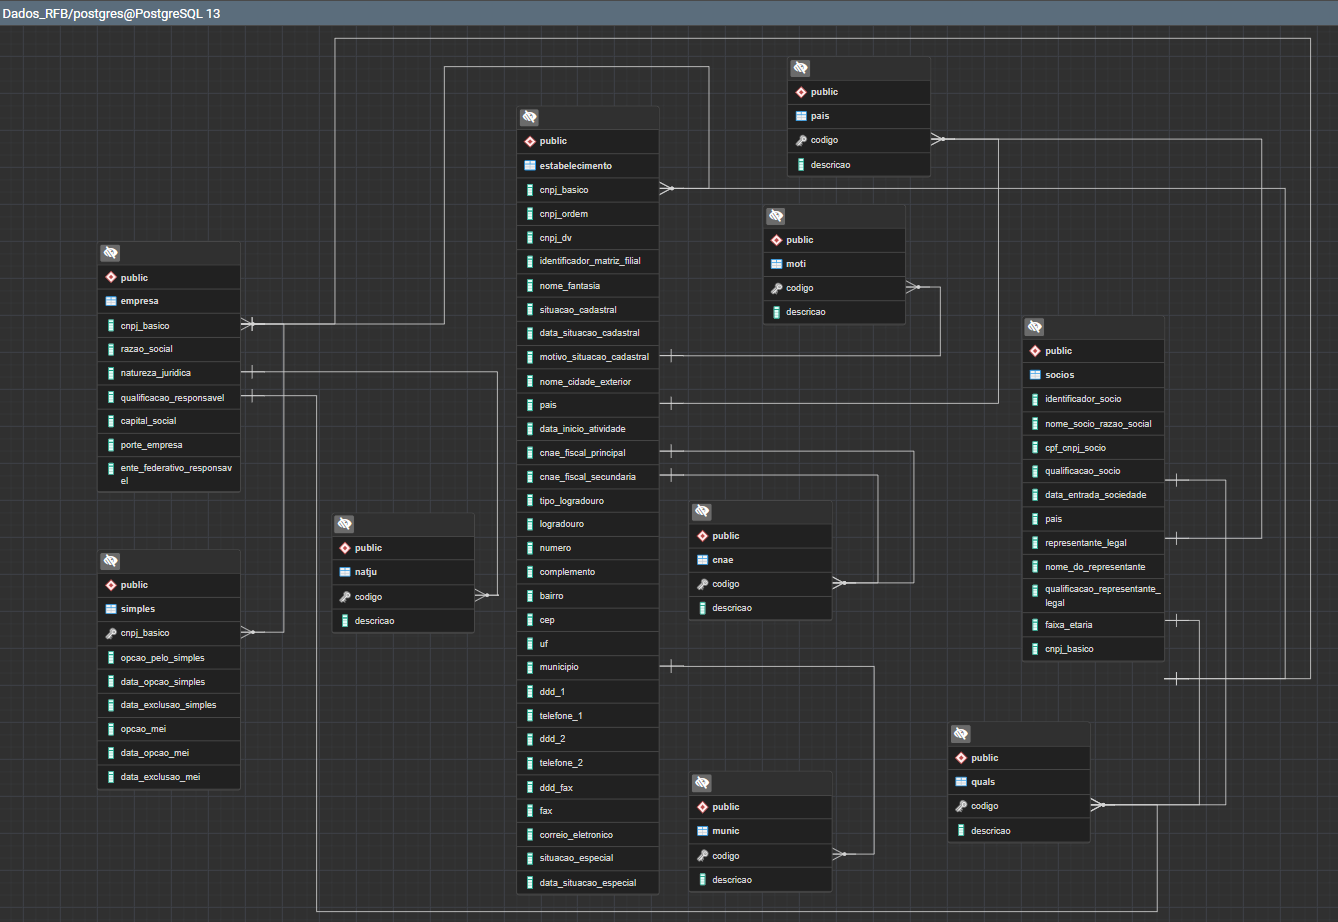)
